In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_estate_data = pd.read_csv(r"C:\Users\johnC\Downloads\Real_Estate_Sales_2001-2021_GL.csv")

C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\3727786720.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_data = pd.read_csv(r"C:\Users\johnC\Downloads\Real_Estate_Sales_2001-2021_GL.csv")


In [3]:
real_estate_data


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,7/5/2022,Avon,53 COTSWOLD WAY,329730,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19200,2019,6/29/2020,Monroe,39 FARM VIEW RD,238400,377400.0,0.6317,Single Family,Single Family,NaN,NaN,NaN,NaN
1048571,190480,2019,2/25/2020,New Haven,498 HOWARD AV,110740,248000.0,0.4465,Two Family,Two Family,NaN,NaN,NaN,NaN
1048572,19022,2019,10/17/2019,Watertown,305 BEACH AVE,192800,235000.0,0.8204,Single Family,Single Family,NaN,NaN,NaN,NaN
1048573,190427,2019,7/16/2020,Trumbull,88 MERRIMAC DR,452620,622500.0,0.7271,Single Family,Single Family,NaN,NaN,NaN,NaN


In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1048575 non-null  int64  
 1   List Year         1048575 non-null  int64  
 2   Date Recorded     1048573 non-null  object 
 3   Town              1048575 non-null  object 
 4   Address           1048524 non-null  object 
 5   Assessed Value    1048575 non-null  int64  
 6   Sale Amount       1048575 non-null  float64
 7   Sales Ratio       1048575 non-null  float64
 8   Property Type     666514 non-null   object 
 9   Residential Type  655076 non-null   object 
 10  Non Use Code      300673 non-null   object 
 11  Assessor Remarks  160328 non-null   object 
 12  OPM remarks       11365 non-null    object 
 13  Location          253824 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 112.0+ MB


In [5]:

real_estate_data.head(), real_estate_data.dtypes


(   Serial Number  List Year Date Recorded     Town                Address  \
 0        2020348       2020     9/13/2021  Ansonia        230 WAKELEE AVE   
 1          20002       2020     10/2/2020  Ashford        390 TURNPIKE RD   
 2         210317       2021      7/5/2022     Avon        53 COTSWOLD WAY   
 3         200212       2020      3/9/2021     Avon       5 CHESTNUT DRIVE   
 4         200243       2020     4/13/2021     Avon  111 NORTHINGTON DRIVE   
 
    Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
 0          150500     325000.0       0.4630    Commercial              NaN   
 1          253000     430000.0       0.5883   Residential    Single Family   
 2          329730     805000.0       0.4096   Residential    Single Family   
 3          130400     179900.0       0.7248   Residential            Condo   
 4          619290     890000.0       0.6958   Residential    Single Family   
 
   Non Use Code Assessor Remarks OPM remarks  \
 0    

In [6]:
# Remove rows where 'Address' or 'Date Recorded' is missing
cleaned_data = real_estate_data.dropna(subset=['Address', 'Date Recorded'])

# Verify removal by checking for remaining missing values in these columns
remaining_missing = cleaned_data[['Address', 'Date Recorded']].isnull().sum()
remaining_missing, cleaned_data.shape


(Address          0
 Date Recorded    0
 dtype: int64,
 (1048524, 14))

In [7]:
# Convert 'Date Recorded' to datetime format
cleaned_data['Date Recorded'] = pd.to_datetime(cleaned_data['Date Recorded'], errors='coerce')

# Extract the sale year from 'Date Recorded'
cleaned_data['Sale Year'] = cleaned_data['Date Recorded'].dt.year

# Group data by 'Sale Year', 'Town', and 'Property Type', then calculate median sale amount
yearly_price_trends = cleaned_data.groupby(['Sale Year', 'Town', 'Property Type'])['Sale Amount'].median()

# Show the resulting data structure
yearly_price_trends.head()


C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\1993199483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date Recorded'] = pd.to_datetime(cleaned_data['Date Recorded'], errors='coerce')
C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\1993199483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sale Year'] = cleaned_data['Date Recorded'].dt.year


Sale Year  Town        Property Type
1999       New London  Condo             95000.0
2001       Greenwich   Single Family    660000.0
           Naugatuck   Single Family    293711.0
           Newington   Condo             88000.0
                       Single Family    256000.0
Name: Sale Amount, dtype: float64

C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\1315025655.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  residential_data = cleaned_data[real_estate_data['Property Type'] == 'Residential']
C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\1315025655.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  commercial_data = cleaned_data[real_estate_data['Property Type'] == 'Commercial']


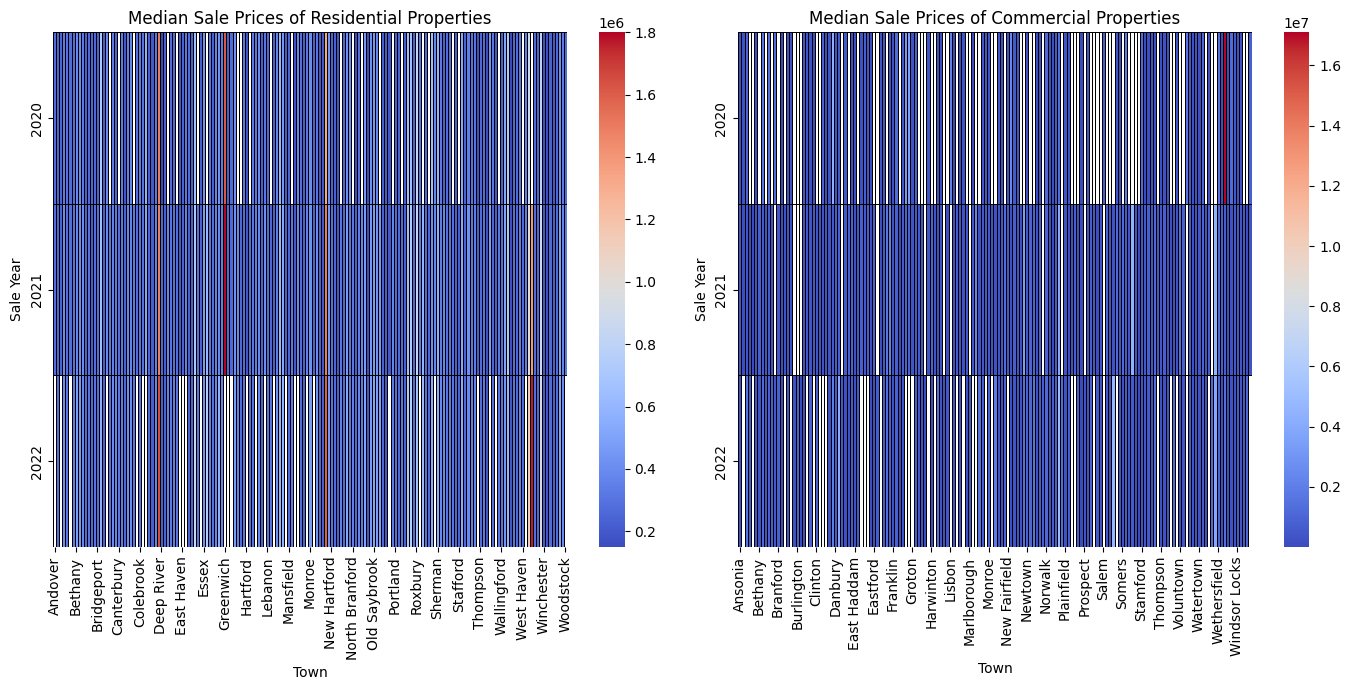

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for residential and commercial properties
residential_data = cleaned_data[real_estate_data['Property Type'] == 'Residential']
commercial_data = cleaned_data[real_estate_data['Property Type'] == 'Commercial']

# Group and calculate median sale amount by Sale Year and Town for each type
residential_trends = residential_data.groupby(['Sale Year', 'Town'])['Sale Amount'].median().unstack()
commercial_trends = commercial_data.groupby(['Sale Year', 'Town'])['Sale Amount'].median().unstack()

# Plot the data
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(residential_trends, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Median Sale Prices of Residential Properties')
plt.xlabel('Town')
plt.ylabel('Sale Year')

plt.subplot(1, 2, 2)
sns.heatmap(commercial_trends, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Median Sale Prices of Commercial Properties')
plt.xlabel('Town')
plt.ylabel('Sale Year')

plt.tight_layout()
plt.show()


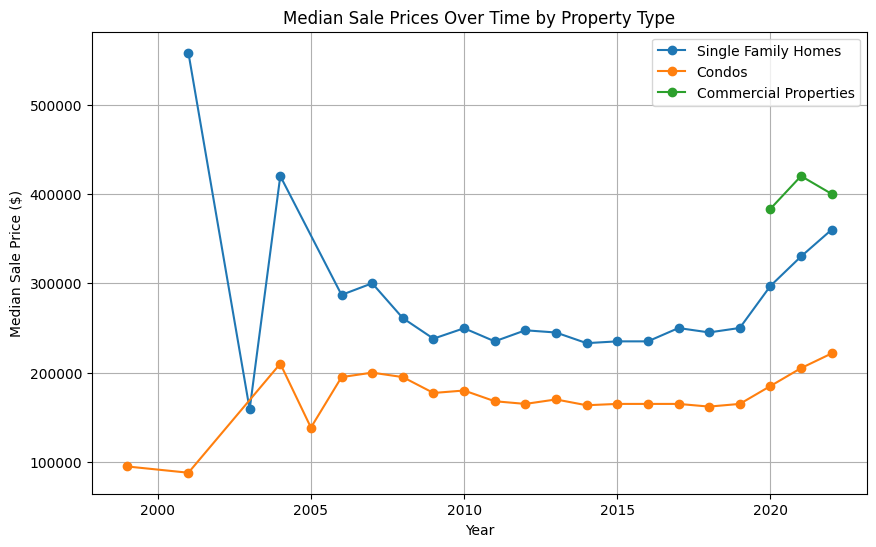

In [9]:
# Filter data for single-family homes and condos
single_family_data = cleaned_data[cleaned_data['Residential Type'] == 'Single Family']
condo_data = cleaned_data[cleaned_data['Residential Type'] == 'Condo']

# Group and calculate median sale amount by Sale Year for each property type
single_family_trends = single_family_data.groupby('Sale Year')['Sale Amount'].median()
condo_trends = condo_data.groupby('Sale Year')['Sale Amount'].median()
commercial_trends_yearly = commercial_data.groupby('Sale Year')['Sale Amount'].median()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(single_family_trends.index, single_family_trends.values, label='Single Family Homes', marker='o')
plt.plot(condo_trends.index, condo_trends.values, label='Condos', marker='o')
plt.plot(commercial_trends_yearly.index, commercial_trends_yearly.values, label='Commercial Properties', marker='o')

plt.title('Median Sale Prices Over Time by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Sale Price ($)')
plt.legend()
plt.grid(True)
plt.show()


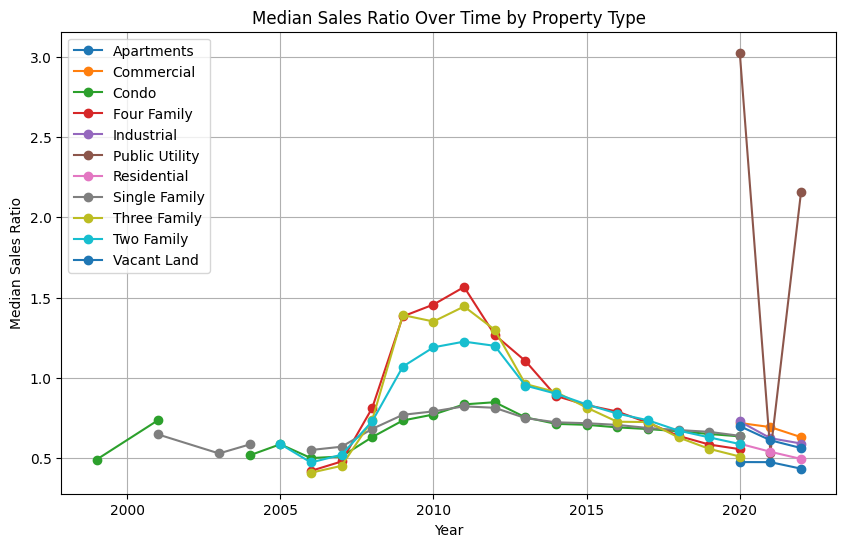

In [10]:
# Group data by Sale Year and Property Type and calculate the median sales ratio
sales_ratio_trends = cleaned_data.groupby(['Sale Year', 'Property Type'])['Sales Ratio'].median().unstack()

# Plot the trends of sales ratios
plt.figure(figsize=(10, 6))
for property_type in sales_ratio_trends.columns:
    plt.plot(sales_ratio_trends.index, sales_ratio_trends[property_type], label=property_type, marker='o')

plt.title('Median Sales Ratio Over Time by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Sales Ratio')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\2149263090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = pd.to_datetime(cleaned_data['Date Recorded']).dt.year


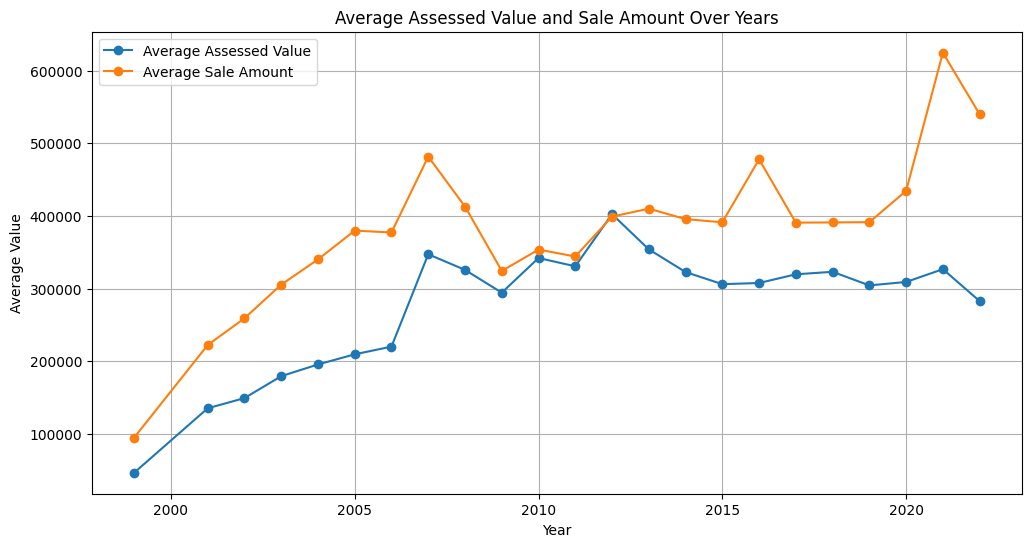

In [11]:
import matplotlib.pyplot as plt

# Extract year from 'Date Recorded' and create a new column for it
cleaned_data['Year'] = pd.to_datetime(cleaned_data['Date Recorded']).dt.year

# Group by the new 'Year' column and calculate average 'Assessed Value' and 'Sale Amount'
yearly_averages = cleaned_data.groupby('Year').agg({
    'Assessed Value': 'mean',
    'Sale Amount': 'mean'
}).reset_index()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_averages['Year'], yearly_averages['Assessed Value'], label='Average Assessed Value', marker='o')
plt.plot(yearly_averages['Year'], yearly_averages['Sale Amount'], label='Average Sale Amount', marker='o')
plt.title('Average Assessed Value and Sale Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Check if location data is available and its format
if 'Location' in cleaned_data.columns:
    # Extract latitude and longitude from the 'Location' column if it contains coordinate data
    cleaned_data['Latitude'] = cleaned_data['Location'].str.extract(r'(\d+\.\d+)').astype(float)
    cleaned_data['Longitude'] = cleaned_data['Location'].str.extract(r'(-\d+\.\d+)').astype(float)

    # Show the first few rows to confirm extraction
    location_summary = cleaned_data[['Location', 'Latitude', 'Longitude']].dropna().head()
else:
    location_summary = "No location data available."

location_summary


C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\2045210280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Latitude'] = cleaned_data['Location'].str.extract(r'(\d+\.\d+)').astype(float)
C:\Users\johnC\AppData\Local\Temp\ipykernel_40244\2045210280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Longitude'] = cleaned_data['Location'].str.extract(r'(-\d+\.\d+)').astype(float)


,Location,Latitude,Longitude
2,POINT (-72.846365959 41.781677018),72.846366,-72.846366
10,POINT (-73.21257902 41.666959986),73.212579,-73.212579
11,POINT (-72.690802027 41.821341986),72.690802,-72.690802
13,POINT (-73.18197 41.64672),73.181970,-73.181970
16,POINT (-72.815906039 41.268214998),72.815906,-72.815906


In [13]:
# Calculate annual sales volume and median sale price
annual_sales_volume = cleaned_data.groupby('Sale Year')['Sale Amount'].count()
annual_median_sale_price = cleaned_data.groupby('Sale Year')['Sale Amount'].median()

# Combine the two series into a single dataframe for better comparison
yearly_market_analysis = pd.DataFrame({
    'Sales Volume': annual_sales_volume,
    'Median Sale Price': annual_median_sale_price
})

# Display the yearly market analysis focusing on recent years for better relevance
yearly_market_analysis  # Display the last 10 years of data


,Sales Volume,Median Sale Price
Sale Year,,
1999,1,95000.0
2001,14290,154900.0
2002,60206,170000.0
2003,56316,189900.0
2004,73934,214400.0
2005,79540,240000.0
2006,57248,250000.0
2007,46132,265000.0
2008,34195,238000.0


In [14]:
# Creating a pivot table
pivot_table = sales_ratio_trends.reset_index()  # Reset index to use 'Sale Year' as a column

# Display the pivot table
print(pivot_table)


Property Type  Sale Year  Apartments  Commercial     Condo  Four Family  \
0                   1999         NaN         NaN  0.491400          NaN   
1                   2001         NaN         NaN  0.735795          NaN   
2                   2003         NaN         NaN       NaN          NaN   
3                   2004         NaN         NaN  0.518156          NaN   
4                   2005         NaN         NaN  0.587186          NaN   
5                   2006         NaN         NaN  0.501162     0.421448   
6                   2007         NaN         NaN  0.511056     0.479975   
7                   2008         NaN         NaN  0.631638     0.812802   
8                   2009         NaN         NaN  0.735087     1.382817   
9                   2010         NaN         NaN  0.772302     1.456451   
10                  2011         NaN         NaN  0.835258     1.565649   
11                  2012         NaN         NaN  0.848819     1.267818   
12                  2013 

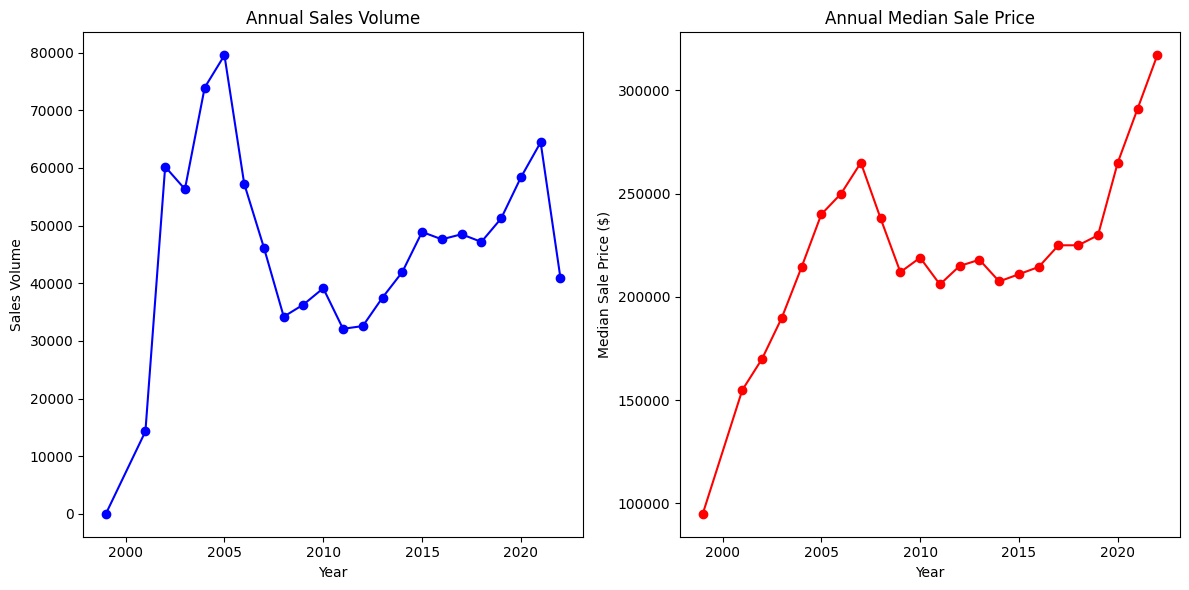

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(yearly_market_analysis['Sales Volume'], marker='o', color='blue')
plt.title('Annual Sales Volume')
plt.xlabel('Year')
plt.ylabel('Sales Volume')

plt.subplot(1, 2, 2)
plt.plot(yearly_market_analysis['Median Sale Price'], marker='o', color='red')
plt.title('Annual Median Sale Price')
plt.xlabel('Year')
plt.ylabel('Median Sale Price ($)')

plt.tight_layout()
plt.show()

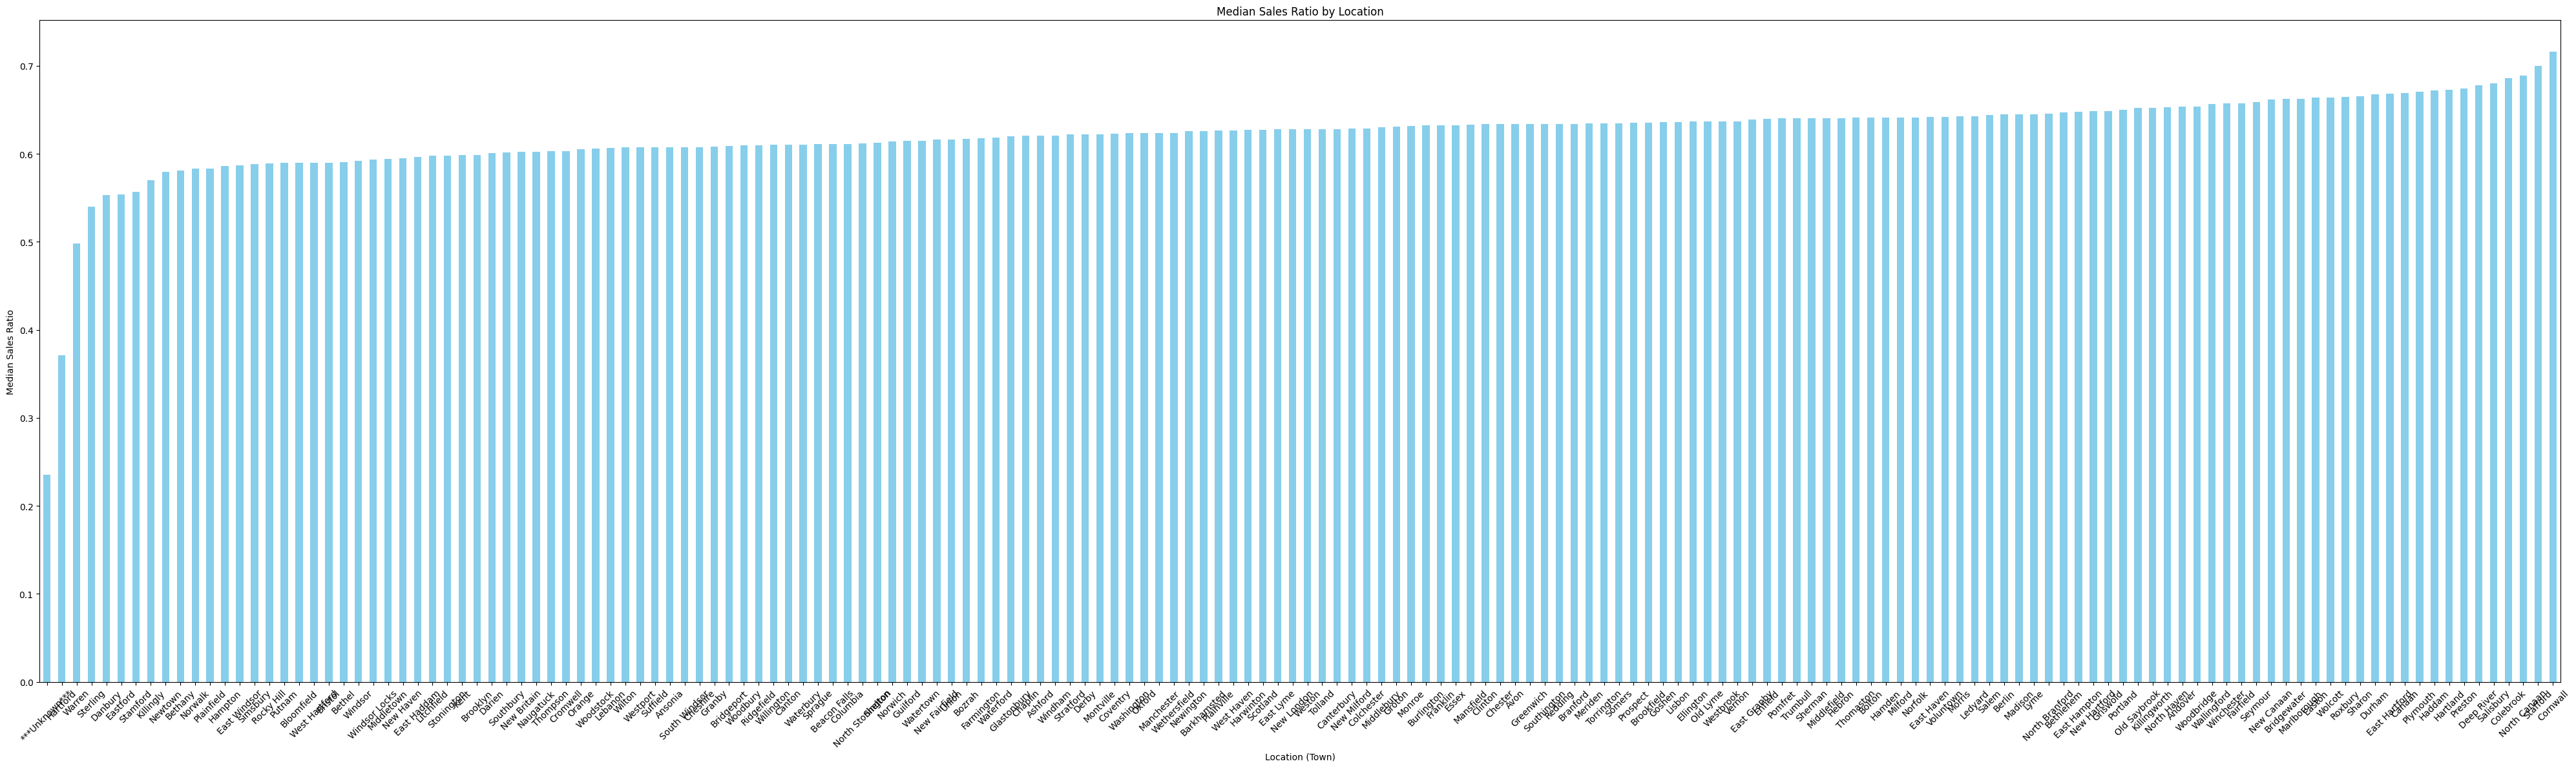

In [16]:
# Calculate median sales ratio by location (town)
median_sales_ratio_by_location = cleaned_data.groupby('Town')['Sales Ratio'].median()

# Plot the results
plt.figure(figsize=(40, 12))
median_sales_ratio_by_location_sorted = median_sales_ratio_by_location.sort_values()
median_sales_ratio_by_location_sorted.plot(kind='bar', color='skyblue')
plt.title('Median Sales Ratio by Location')
plt.xlabel('Location (Town)')
plt.ylabel('Median Sales Ratio')
plt.xticks(rotation=45)  # Rotate location names for better visibility
plt.tight_layout()
plt.show()




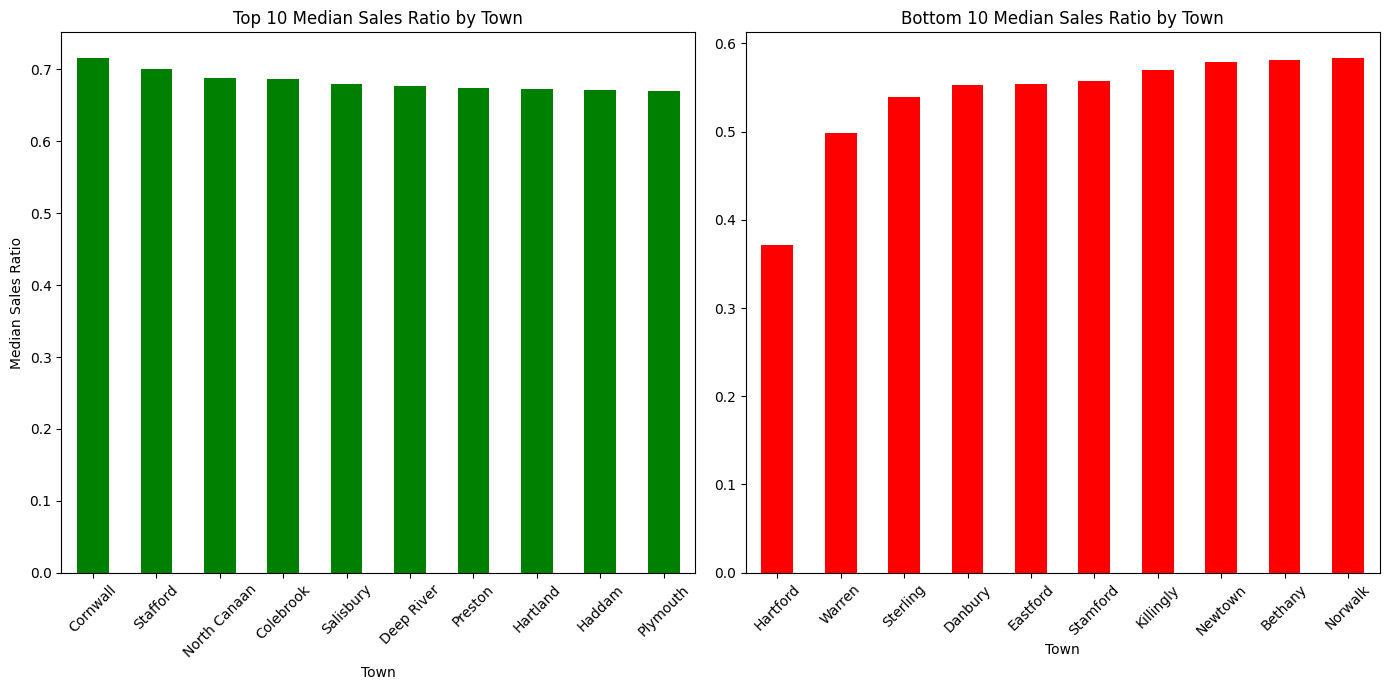

In [17]:
# Compute median sales ratio by town and remove 'Unknown' entries
median_sales_ratio_by_location = cleaned_data[cleaned_data['Town'] != '***Unknown***'].groupby('Town')['Sales Ratio'].median()

# Sorting and selecting top 10 and bottom 10
top_10 = median_sales_ratio_by_location.sort_values(ascending=False).head(10)
bottom_10 = median_sales_ratio_by_location.sort_values().head(10)

# Plotting Top 10 and Bottom 10
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
top_10.plot(kind='bar', color='green')
plt.title('Top 10 Median Sales Ratio by Town')
plt.xlabel('Town')
plt.ylabel('Median Sales Ratio')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bottom_10.plot(kind='bar', color='red')
plt.title('Bottom 10 Median Sales Ratio by Town')
plt.xlabel('Town')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [28]:
yearly_sales_data = cleaned_data.groupby('Year').agg({
    'Sale Amount': ['count', 'mean']
}).reset_index()

# Flatten the MultiIndex in columns
yearly_sales_data.columns = ['Year', 'Count of Sales', 'Average Sale Amount']

# Print DataFrame to check it
print(yearly_sales_data)




    Year  Count of Sales  Average Sale Amount
0   1999               1         95000.000000
1   2001           14290        222415.567950
2   2002           60206        259167.767116
3   2003           56316        305489.345568
4   2004           73934        340218.050856
5   2005           79540        379828.353068
6   2006           57248        377271.832710
7   2007           46132        481666.966301
8   2008           34195        412965.585787
9   2009           36305        324367.223771
10  2010           39128        353688.214169
11  2011           32088        344237.602686
12  2012           32568        399134.953519
13  2013           37513        410035.313545
14  2014           41941        395638.273146
15  2015           48894        391299.658459
16  2016           47611        477925.685703
17  2017           48491        390795.334333
18  2018           47164        391116.635979
19  2019           51226        391436.174755
20  2020           58346        43

In [30]:
import os
print(os.getcwd())


c:\Users\johnC\AppData\Local\Programs\Microsoft VS Code


In [32]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [35]:
yearly_sales_data.to_excel(r"C:\Users\johnC\Downloads\yearly_sales_data_v2.xlsx", index=False)


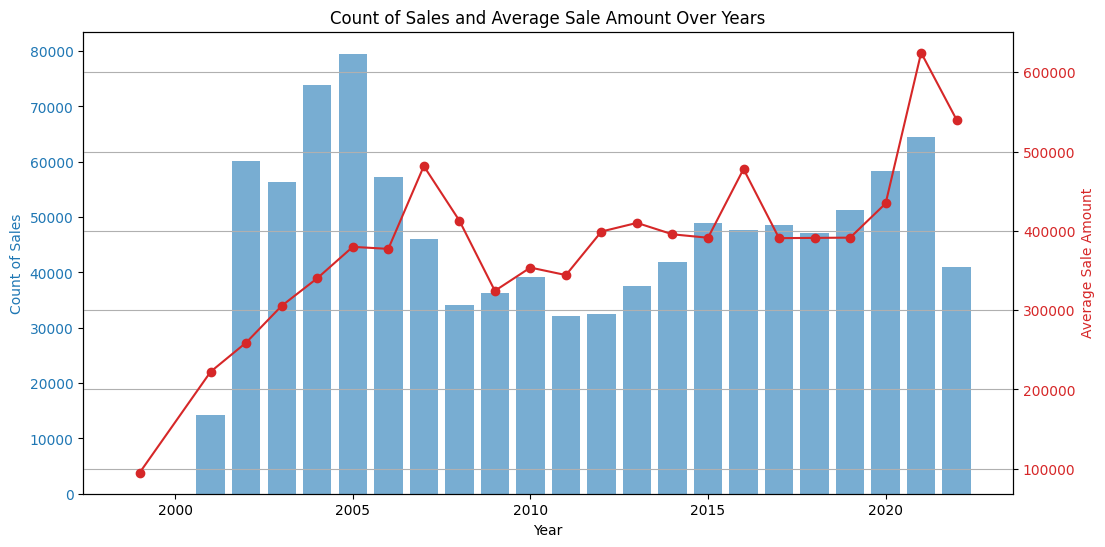

In [19]:
# Calculate count of sales and average sale amount per year
yearly_sales_data = cleaned_data.groupby('Year').agg({
    'Sale Amount': ['count', 'mean']
}).reset_index()
yearly_sales_data.columns = ['Year', 'Count of Sales', 'Average Sale Amount']

# Plotting the results with a secondary Y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Sales', color=color)
ax1.bar(yearly_sales_data['Year'], yearly_sales_data['Count of Sales'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Sale Amount', color=color)
ax2.plot(yearly_sales_data['Year'], yearly_sales_data['Average Sale Amount'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Count of Sales and Average Sale Amount Over Years')
plt.grid(True)
plt.show()


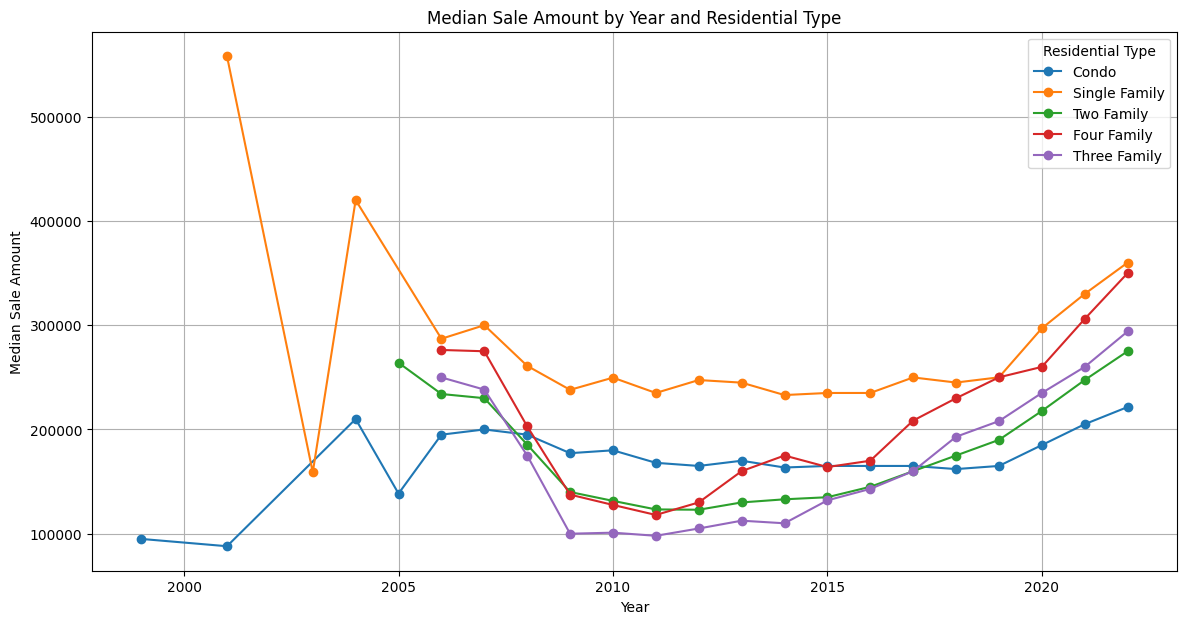

In [20]:
# Calculate median of sale amount per year for each residential type
median_sales_by_type = cleaned_data.groupby(['Year', 'Residential Type']).agg({
    'Sale Amount': 'median'
}).reset_index()

# Plotting the results
plt.figure(figsize=(14, 7))
for res_type in median_sales_by_type['Residential Type'].unique():
    subset = median_sales_by_type[median_sales_by_type['Residential Type'] == res_type]
    plt.plot(subset['Year'], subset['Sale Amount'], marker='o', label=res_type)

plt.title('Median Sale Amount by Year and Residential Type')
plt.xlabel('Year')
plt.ylabel('Median Sale Amount')
plt.legend(title='Residential Type')
plt.grid(True)
plt.show()


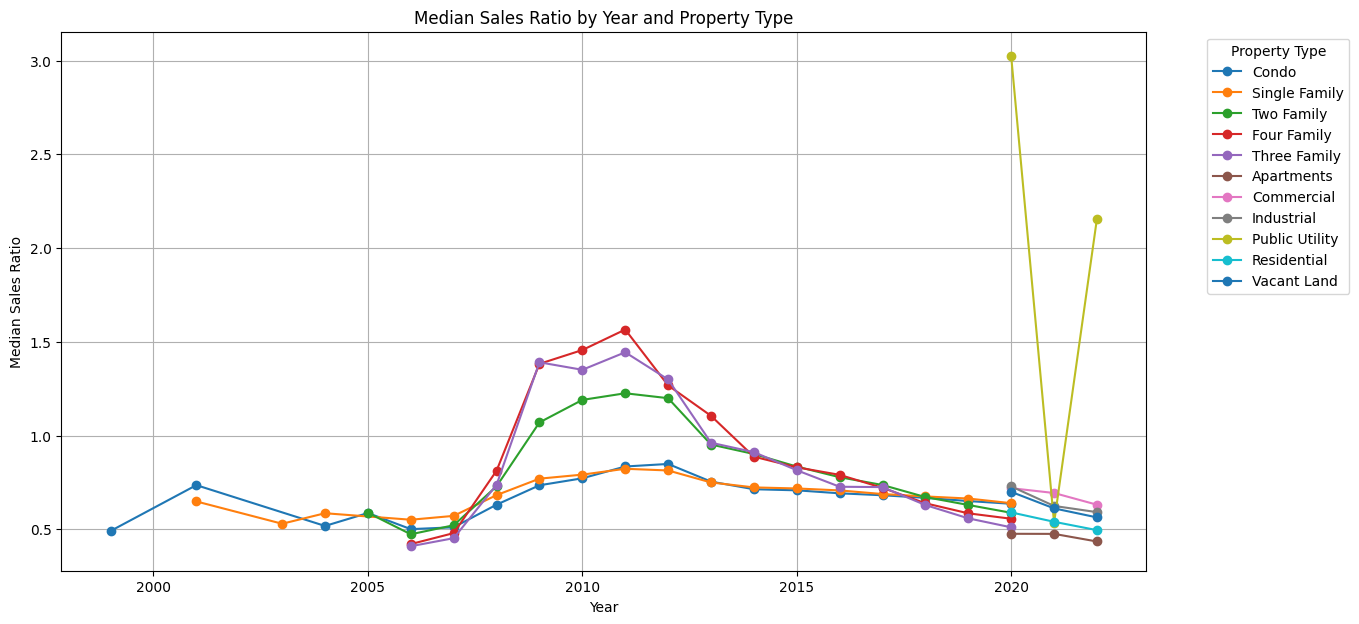

In [21]:
# Calculate median of sales ratio per year for each property type
median_sales_ratio_by_type = cleaned_data.groupby(['Year', 'Property Type']).agg({
    'Sales Ratio': 'median'
}).reset_index()

# Plotting the results
plt.figure(figsize=(14, 7))
property_types = median_sales_ratio_by_type['Property Type'].unique()
for prop_type in property_types:
    if type(prop_type) == str:  # Ensure we only plot valid property types (non-null)
        subset = median_sales_ratio_by_type[median_sales_ratio_by_type['Property Type'] == prop_type]
        plt.plot(subset['Year'], subset['Sales Ratio'], marker='o', label=prop_type)

plt.title('Median Sales Ratio by Year and Property Type')
plt.xlabel('Year')
plt.ylabel('Median Sales Ratio')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [22]:
# Filter data for specific columns needed for the analysis
focused_data = real_estate_data[['List Year', 'Town', 'Sales Ratio', 'Property Type', 'Residential Type']]

# Analyze sales ratio trends by property type and residential type across all towns
property_type_analysis = focused_data.groupby(['Town', 'Property Type', 'Residential Type'])['Sales Ratio'].median().reset_index()

# Display the results to see trends and insights
property_type_analysis


,Town,Property Type,Residential Type,Sales Ratio
0,***Unknown***,Single Family,Single Family,0.235582
1,Andover,Residential,Single Family,0.579649
2,Andover,Single Family,Single Family,0.721738
3,Andover,Two Family,Two Family,0.766500
4,Ansonia,Condo,Condo,0.786667
...,...,...,...,...
1317,Woodstock,Residential,Single Family,0.485600
1318,Woodstock,Residential,Two Family,0.597500
1319,Woodstock,Single Family,Single Family,0.690196
1320,Woodstock,Three Family,Three Family,0.912727


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot with sns.catplot
g = sns.catplot(x='Town', y='Sales Ratio', hue='Property Type', col='Residential Type', data=top_10_sales_ratios, kind='bar', col_wrap=4, height=4, aspect=1)
g.fig.subplots_adjust(top=0.85)  # Adjust the top space to accommodate the title
g.fig.suptitle('Top 10 Median Sales Ratios by Town, Property Type, and Residential Type', fontsize=16)  # Set the title of the plot

# Adjust x-ticks rotation
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():  # Get x labels
        label.set_rotation(45)  # Rotate labels

plt.show()


NameError: name 'top_10_sales_ratios' is not defined

C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

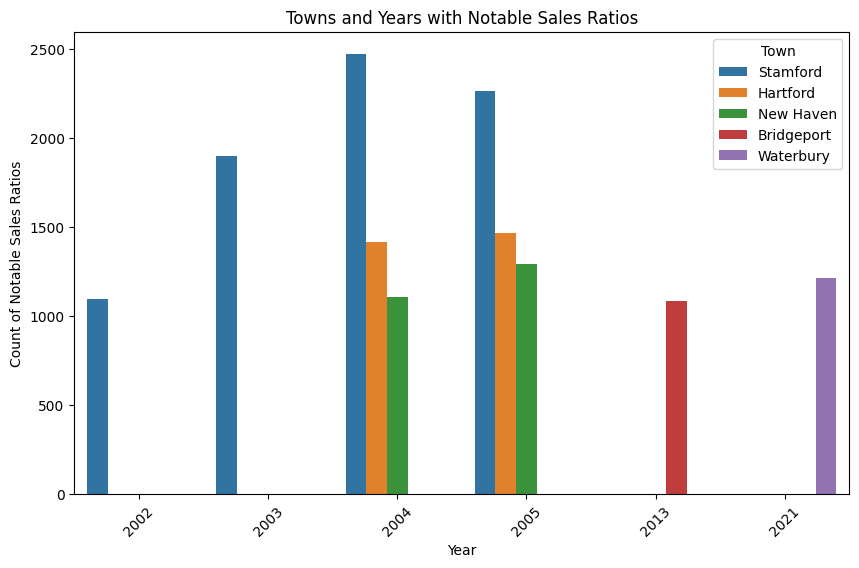

In [ ]:
# Identifying towns and years with notable high or low sales ratios for further analysis
# We define "notable" as being in the top or bottom 10% of sales ratios across the dataset

# Calculate quantiles for high and low thresholds
high_threshold = real_estate_data['Sales Ratio'].quantile(0.90)
low_threshold = real_estate_data['Sales Ratio'].quantile(0.10)

# Filter data based on these thresholds
notable_sales_ratios = real_estate_data[(real_estate_data['Sales Ratio'] >= high_threshold) | 
                                        (real_estate_data['Sales Ratio'] <= low_threshold)]

# Group by year and town for notable cases
notable_trends = notable_sales_ratios.groupby(['List Year', 'Town']).size().reset_index(name='Counts')

# Select towns and years with the most occurrences of notable sales ratios
most_notable_trends = notable_trends.sort_values(by='Counts', ascending=False).head(10)

# Visualizing these notable cases
plt.figure(figsize=(10, 6))
sns.barplot(x='List Year', y='Counts', hue='Town', data=most_notable_trends)
plt.title('Towns and Years with Notable Sales Ratios')
plt.ylabel('Count of Notable Sales Ratios')
plt.xlabel('Year')
plt.legend(title='Town')
plt.xticks(rotation=45)
plt.show()
